
**Company_A Bike Service**

We will try to understand which variables are significant in predicting the demand for shared electric cycles in the Indian market.

How well those variables describe the electric cycle demands.

Given data description:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered (Target)

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#loading data
raw_data = pd.read_csv('/content/gdrive/MyDrive/yulu_bike_sharing.csv')
raw_data.head() #checking loaded data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
raw_data.shape

(10886, 12)

We have 12 columns and 10886 rows (data points).

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


We can observe that for columns like season, holiday, workingday and weather should be categorical variable but it is defined as numerical.
So we will change dtype for these columns to object.

We can also observe that the datetime columns is in object type while it should be in datetime data type.

There are no null value present in given data.

In [ ]:
raw_data['season'] = raw_data['season'].astype('object')
raw_data['holiday'] = raw_data['holiday'].astype('object')
raw_data['workingday'] = raw_data['workingday'].astype('object')
raw_data['weather'] = raw_data['weather'].astype('object')
raw_data['datetime'] = pd.to_datetime(raw_data['datetime'])

Let's create a time and date columns for better analysis.

In [ ]:
raw_data['Time']  = raw_data['datetime'].dt.strftime('%H:%M')

In [ ]:
raw_data['date'] = raw_data['datetime'].dt.date

In [ ]:
raw_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'Time', 'date'],
      dtype='object')

In [ ]:
#rearrange for better visualization/understanding.
raw_data = raw_data[['datetime','date', 'Time', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count' ]]
raw_data.head(5)

,datetime,date,Time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011-01-01,00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,2011-01-01,01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,2011-01-01,02:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,2011-01-01,03:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,2011-01-01,04:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
raw_data.nunique()

datetime      10886
date            456
Time             24
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
raw_data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,datetime,date,Time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,456,24,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,2011-01-01,12:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,24,456,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000


The given data is from 1st January, 2011 to 19th december, 2012. Data is for 456 days.

Here, we can observe that, winter season data points are more in given data. Most of days are not hodilay and it's working day. Most of the data points are of clear weather.

The temperature has ranged from 0.82 to 41 in degree celsius. The mean average temperature is 20.23 while the median is at 20.5 which means there are less (or no) outliers present in the data.

People felt the average temperature to be 23 degree celsius.

Humidity ranged from 0 to 100% and average humidity is 61% and median is 62% which means data is not skewed at any side.

Wind speed ranged from 0 to 56.99 m/s.

On an average 36 casual users use bike rent service hourly while it is 155 in case of registered user.

Maximum casual users is 367 for an hour while it is 886 with registered user.

On an average 191 people uses company_a services in an hour.


#Univariant Analysis

In [ ]:
raw_data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

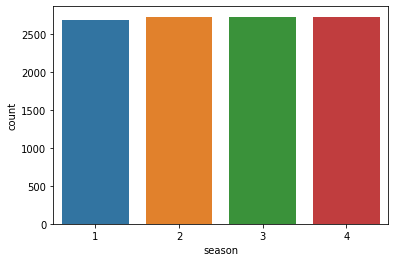

In [ ]:
sns.countplot(data = raw_data, x ='season')

Number of data points are almost same for all the seasons.

In [ ]:
raw_data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

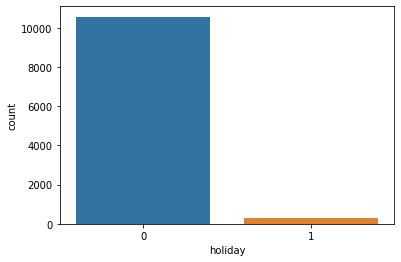

In [ ]:
sns.countplot(data = raw_data, x = 'holiday')

10575 days are non holiday day while only 311 are with holiday.

In [ ]:
raw_data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

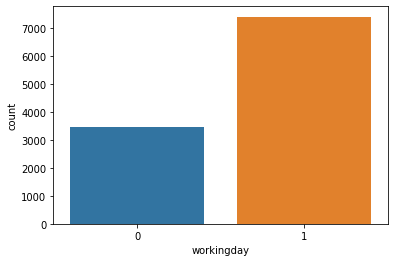

In [ ]:
sns.countplot(data = raw_data, x = 'workingday')

Most of the data points are for working day.

In [ ]:
raw_data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

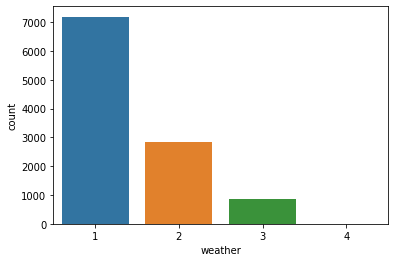

In [ ]:
sns.countplot(data = raw_data, x = 'weather')

There is only one data point for 4th weather.
Most of the time sky is clear.

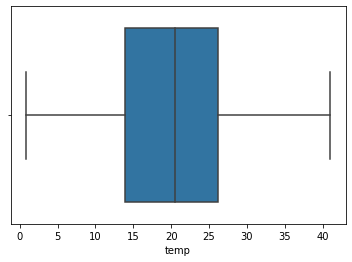

In [ ]:
sns.boxplot(data = raw_data, x= 'temp')

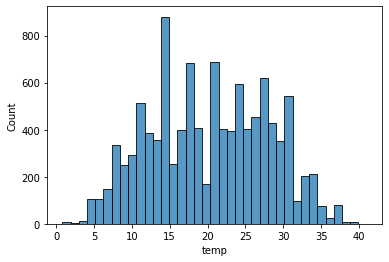

In [ ]:
sns.histplot(raw_data['temp'])

50 % of the times temperature was between 13 to 26.

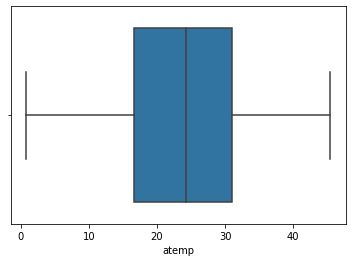

In [ ]:
sns.boxplot(data = raw_data, x ='atemp')

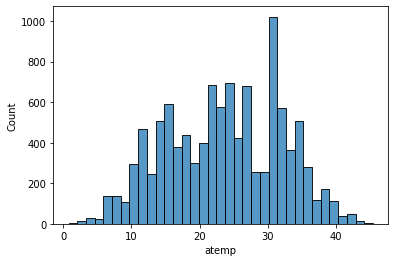

In [ ]:
sns.histplot(raw_data['atemp'])

50 % of the times temperature felt like 16 to 31.

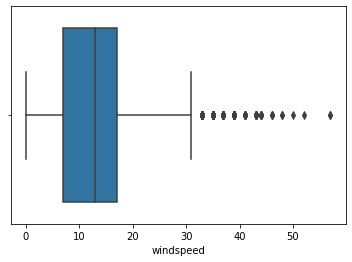

In [ ]:
sns.boxplot(x = 'windspeed', data = raw_data)

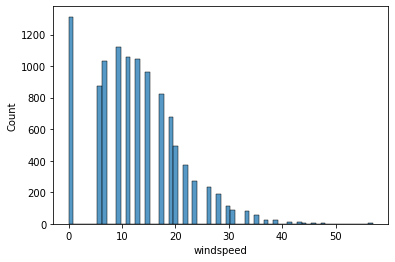

In [ ]:
sns.histplot(raw_data['windspeed'])

Windspeed data is right skewed. A lot of outliers are present for windspeed.

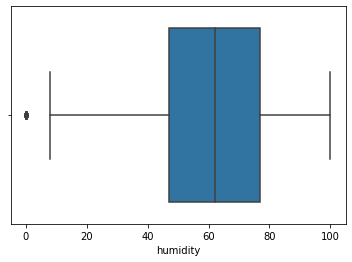

In [ ]:
sns.boxplot(data = raw_data, x = 'humidity')

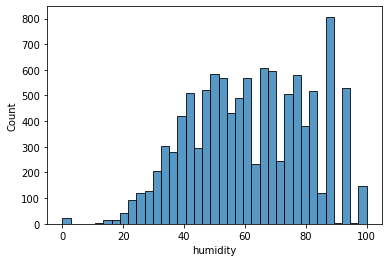

In [ ]:
sns.histplot(raw_data['humidity'])

Hunidity data is left skewed data.

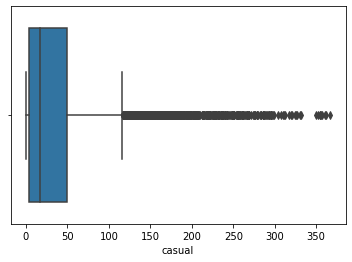

In [ ]:
sns.boxplot(x = 'casual', data =raw_data)

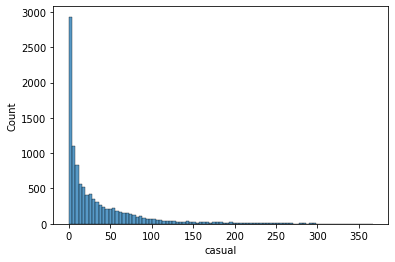

In [ ]:
sns.histplot(raw_data['casual'])

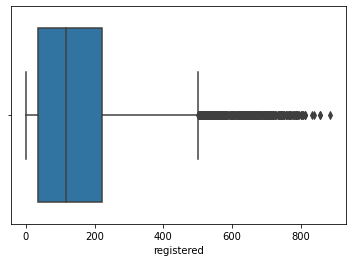

In [ ]:
sns.boxplot(x = 'registered', data = raw_data)

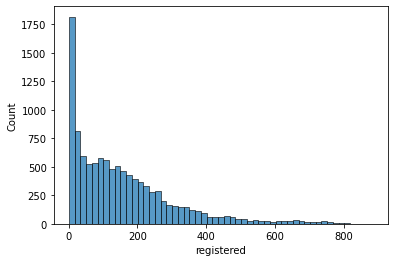

In [ ]:
sns.histplot(raw_data['registered'])

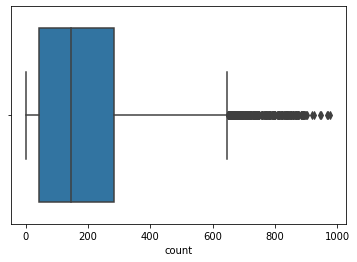

In [ ]:
sns.boxplot(x = 'count', data = raw_data)

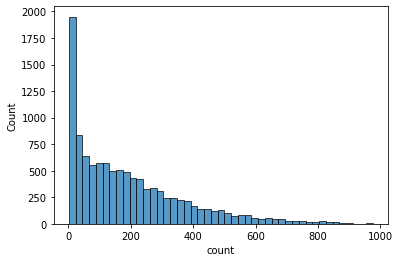

In [ ]:
sns.histplot(raw_data['count'])

Count, casual and registered  data are right skewed.

50% times number of electric cycle booked range from 42 to 284. And we can see after that a lot of outlier is present.

In [ ]:
count_daywise = raw_data.groupby(['date'])['count'].sum()

In [ ]:
count_daywise

date
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-15    5047
2012-12-16    3786
2012-12-17    4585
2012-12-18    5557
2012-12-19    5267
Name: count, Length: 456, dtype: int64

In [ ]:
count_daywise.max()

8714

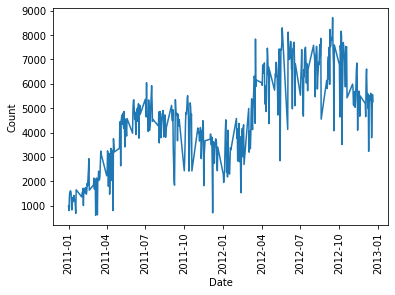

In [ ]:
plt.plot(raw_data['date'].unique(),count_daywise)
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

It's seems number of people using bike rent service has increased from start day to end date.

The maximum it reached was 8714 people in a single day.

In [ ]:
count_timewise = raw_data.groupby(['Time'])['count'].sum()
count_timewise

Time
00:00     25088
01:00     15372
02:00     10259
03:00      5091
04:00      2832
05:00      8935
06:00     34698
07:00     96968
08:00    165060
09:00    100910
10:00     79667
11:00     95857
12:00    116968
13:00    117551
14:00    111010
15:00    115960
16:00    144266
17:00    213757
18:00    196472
19:00    143767
20:00    104204
21:00     79057
22:00     60911
23:00     40816
Name: count, dtype: int64

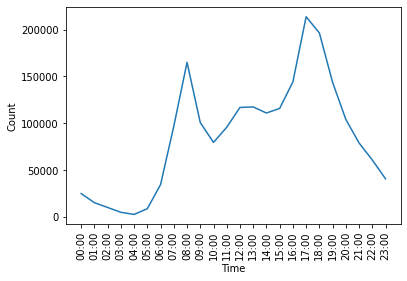

In [ ]:
plt.plot(raw_data['Time'].unique(),count_timewise)
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

The demand for bikes peaks twice in a day
8:00 am and 5:00pm as expected. Because this is the time people start for office and leave office.

#Bivariant Analysis

Let's see how the count varies for different seasons

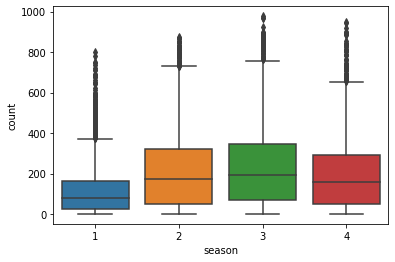

In [ ]:
sns.boxplot(y = 'count', x = 'season', data = raw_data)

In [ ]:
raw_data.groupby(['season'])['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

Number of electric bike rented is more in season 3.
We can see from the box plot the median for season 3 is highest.
All of the seasons have a lot of outliers.

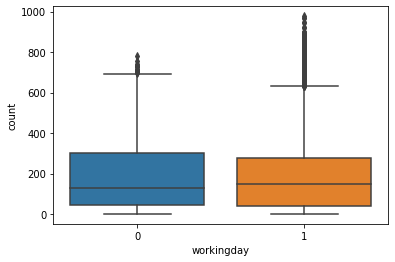

In [ ]:
sns.boxplot(y = 'count', x = 'workingday', data = raw_data)

In [ ]:
raw_data.groupby(['workingday'])['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

The numbers of electric cycles rented on working day is more than on non working day.

The meadian of working day is also more than non working day. But working day has a lot of outliers.

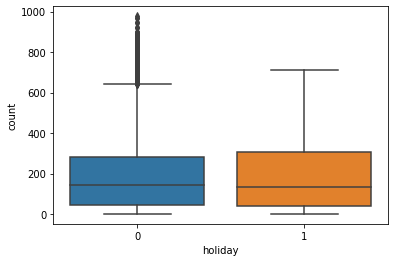

In [ ]:
sns.boxplot(y = 'count', x = 'holiday', data = raw_data)

In [ ]:
raw_data.groupby(['holiday'])['count'].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

The numbers of electric cycles rented on non holiday day is more than on holiday day.

The meadian of working day is also more than non working day. But working day has a lot of outliers.

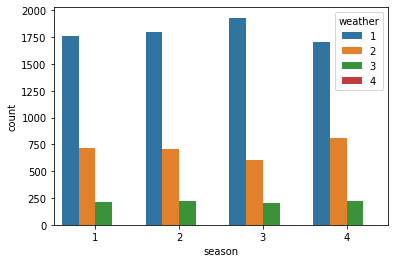

In [ ]:
#season and weather
sns.countplot(x='season', hue = 'weather', data = raw_data)

All seasons have all weather except for the 4th one (heavy rain).
Clear sky weather is most common in all season.

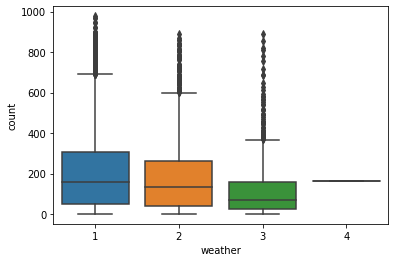

In [ ]:
sns.boxplot(y = 'count', x = 'weather', data = raw_data)

In [ ]:
raw_data.groupby(['weather'])['count'].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

People have rented bikes on clear day more than other days.

The median too for clear day is highest among the group.

#Hyothesis Testing
Let's find out which features are more significant and impacting 'count' value

We will perform different Hyothesis Testing to find features which are important.

In [ ]:
#importing libraries required for hypothesis testing
from scipy.stats import f_oneway, kruskal
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import kstest, boxcox

---
## Season Vs Count

Let's see if season has impact on the 'count'

H0: Season has no impact on 'count'

Ha: Season has impact 'count'

We will do anova test in this case as we have categorical variable with more than 2 categories.

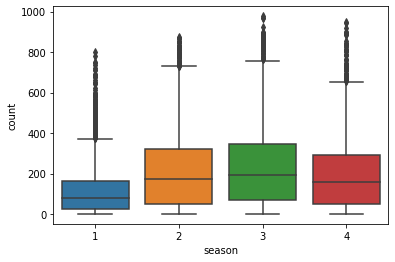

In [ ]:
sns.boxplot(y = 'count', x = 'season', data = raw_data)

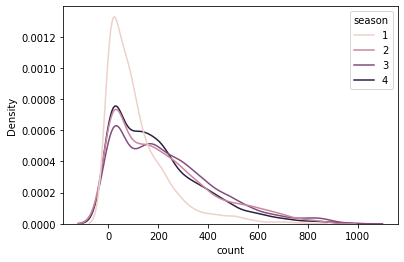

In [ ]:
sns.kdeplot(x = 'count', data = raw_data, hue = 'season')

We can see the data is not normal, so it violates one of the assumption of ANOVA.

In [ ]:
raw_data.groupby(['season'])['count'].mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

We can observe that mean of number of electric cycles rented in each season is different and it varying from 116.34 to 198.98.

We will do ANOVA test to see if this difference is statistically significant or not.

In [ ]:
df_season_1 = raw_data[raw_data['season']==1]
df_season_2 = raw_data[raw_data['season']==2]
df_season_3 = raw_data[raw_data['season']==3]
df_season_4 = raw_data[raw_data['season']==4]

In [ ]:
#shaprio test to check if curve is normal or not
#null hypothesis of shaprio is that distribution is normal
print("Count data for season 1", shapiro(df_season_1['count']))
print("Count data for season 2", shapiro(df_season_2['count']))
print("Count data for season 3", shapiro(df_season_3['count']))
print("Count data for season 4", shapiro(df_season_4['count']))

Count data for season 1 ShapiroResult(statistic=0.8087379336357117, pvalue=0.0)
Count data for season 2 ShapiroResult(statistic=0.9004813432693481, pvalue=6.038565025570219e-39)
Count data for season 3 ShapiroResult(statistic=0.9148167371749878, pvalue=1.0437356147871525e-36)
Count data for season 4 ShapiroResult(statistic=0.8954642415046692, pvalue=1.130082751748606e-39)


All the p-value is very small, so we **reject the null hypothesis which means distribution is not normal.**
From kde plot and shaprio test we conclude that distribution is not normal.

Let's try log transform on it and see the p-values

In [ ]:
print("Count data for season 1", shapiro(np.log(df_season_1['count'])))
print("Count data for season 2", shapiro(np.log(df_season_2['count'])))
print("Count data for season 3", shapiro(np.log(df_season_3['count'])))
print("Count data for season 4", shapiro(np.log(df_season_4['count'])))

Count data for season 1 ShapiroResult(statistic=0.9254218339920044, pvalue=1.3553901006855851e-34)
Count data for season 2 ShapiroResult(statistic=0.904329240322113, pvalue=2.2633447694530722e-38)
Count data for season 3 ShapiroResult(statistic=0.8916517496109009, pvalue=3.379091116872864e-40)
Count data for season 4 ShapiroResult(statistic=0.9040923714637756, pvalue=2.0566854758298412e-38)


Still p-value remain very low. We again reject the null hypothesis.
with 99% confidence it can be said that the distributions are not normal.
This is violation of ANOVA assumption.

In [ ]:
e1 = ECDF(df_season_1['count'])
e2 = ECDF(df_season_2['count'])
e3 = ECDF(df_season_3['count'])
e4 = ECDF(df_season_4['count'])

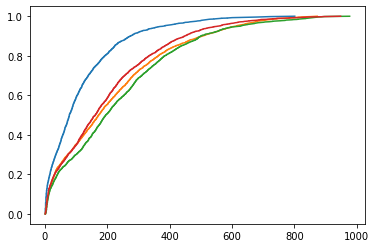

In [ ]:
plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)
plt.plot(e3.x, e3.y)
plt.plot(e4.x, e4.y)

From the ECDF plot we can observe that the distribution of all four samples are not same.

In [ ]:
print(df_season_1['count'].std())
print(df_season_2['count'].std())
print(df_season_3['count'].std())
print(df_season_4['count'].std())

125.27397388810313
192.00784313546262
197.15100053680393
177.62240938763696


In [ ]:
levene(df_season_1['count'], df_season_2['count'], df_season_3['count'], df_season_4['count'])

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

As the p-value is very small, we reject the null hypothesis which means the difference in the **standard deviation of these four sample is significant**.

In [ ]:
f_oneway(df_season_1['count'], df_season_2['count'], df_season_3['count'], df_season_4['count'])

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

In [ ]:
#let's see if log transform will change the result or not.
f_oneway(np.log(df_season_1['count']), np.log(df_season_2['count']), np.log(df_season_3['count']), np.log(df_season_4['count']))

F_onewayResult(statistic=192.44768979509686, pvalue=1.3071364586238867e-121)

In [ ]:
kruskal(df_season_1['count'], df_season_2['count'], df_season_3['count'], df_season_4['count'])

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Even if we take alpha as 1%.
P-value is still less than that.

**So we reject the null hypothesis which means the number of electric cycles rented is dependent on the season**.

---
## Weather vs Count

Let's see if Weather has impact on the 'count'

H0: Weather has no impact on 'count'

Ha: Weather has impact 'count'

We will do anova test in this case as we have categorical variable with more than 2 categories.

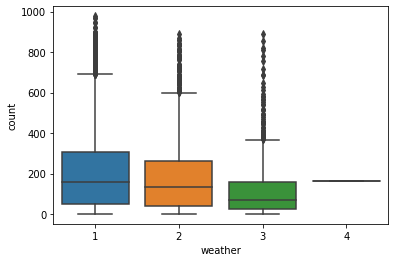

In [ ]:
sns.boxplot(y = 'count', x = 'weather', data = raw_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


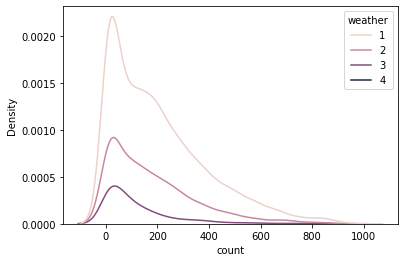

In [ ]:
sns.kdeplot(x = 'count', data = raw_data, hue = 'weather')

In [ ]:
df_weather_1 = raw_data[raw_data['weather']==1]
df_weather_2 = raw_data[raw_data['weather']==2]
df_weather_3 = raw_data[raw_data['weather']==3]
df_weather_4 = raw_data[raw_data['weather']==4]

In [ ]:
#shaprio test to check if curve is normal or not
#null hypothesis of shaprio is that distribution is normal
print("Count data for weather 1", shapiro(df_weather_1['count']))
print("Count data for weather 2", shapiro(df_weather_2['count']))
print("Count data for weather 3", shapiro(df_weather_3['count']))
#print("Count data for weather 4", shapiro(df_weather_4['count']))

Count data for weather 1 ShapiroResult(statistic=0.8909225463867188, pvalue=0.0)
Count data for weather 2 ShapiroResult(statistic=0.8767690658569336, pvalue=9.781063280987223e-43)
Count data for weather 3 ShapiroResult(statistic=0.7674333453178406, pvalue=3.876134581802921e-33)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


From above kde plot and shapiro test, we can say that the data is not normal which violates the ANOVA assumptions.

We can also see that number of points for 4 weather is less.

Let's see if the variance in samples are sampe or not.

In [ ]:
e1 = ECDF(df_weather_1['count'])
e2 = ECDF(df_weather_2['count'])
e3 = ECDF(df_weather_3['count'])
e4 = ECDF(df_weather_4['count'])

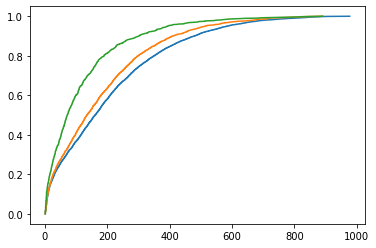

In [ ]:
plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)
plt.plot(e3.x, e3.y)
plt.plot(e4.x, e4.y)

The distribution of data is also not similar for each sample.

In [ ]:
print(df_weather_1['count'].std())
print(df_weather_2['count'].std())
print(df_weather_3['count'].std())
print(df_weather_4['count'].std())

187.9595660313149
168.36641290145073
138.5812970523591
nan


In [ ]:
#H0: variance is same in each sample.
levene(df_weather_1['count'], df_weather_2['count'], df_weather_3['count'], df_weather_4['count'])

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

As the p-value is very small, we reject the null hypothesis which means **difference in the standard deviantion is significant**.

We can observe from the levene test result that variance is not same, which violates the ANOVA assumptions.

In [ ]:
#ANOVA test
f_oneway(df_weather_1['count'], df_weather_2['count'], df_weather_3['count'], df_weather_4['count'])

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

In [ ]:
#ANOVA test
# let's calculate by not including the 4th weather data.
f_oneway(df_weather_1['count'], df_weather_2['count'], df_weather_3['count'])

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

In [ ]:
# As ANOVA assumptions are violated, we can find check the hypothesis using the kruskal which is robust to these violatation.
kruskal(df_weather_1['count'], df_weather_2['count'], df_weather_3['count'], df_weather_4['count'])

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

Even if we take alpha as 1%.
P-value is still less than that.

**So we reject the null hypothesis which means the number of electric cycles rented is dependent on the weather.**

___
## Weather vs Season

Now we will check if Weather is dependent on the seasons.

H0: The two features are independent.

Ha: The two features are dependent.



In [ ]:
season_weather = pd.crosstab(raw_data['season'], raw_data['weather'])
season_weather

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


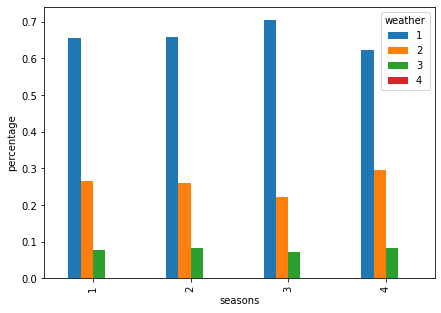

In [ ]:
season_weather.div(season_weather.sum(axis = 1), axis = 0).plot(kind = 'bar', figsize=(7,5))
plt.xlabel("seasons")
plt.ylabel("percentage")
plt.show()

In [ ]:
chi2_contingency(season_weather)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

Let's check if we can use chi-square test.
Assumptions of chi-squared test:
1. Both should be categorical variable.
       - yes season and weather are categorical variable.
2. All observations are independent.
       - yes observations are independent (not any specific given in data description)

3. Cells in the contengency table are mutually exclusive.
       - yes, they are. (not any specific given in data description)

4. Expected value of the cell should be 5 or greater in atlest 80% of cells.
      - 4 out of 16 doesn't follow this assumption.

        Only 75% cell have value greater than 5.

**So we can't rely on the result of the chi-square test**.

But as the p-value is very less we can reject the null hypothesis which means these two features are dependent on each other.


___

## Working Day vs Count

Now we can check whether day being working day or not affects the number of cycles rented (count).

H0: Count is indenpendent of whether day is working or not.

Ha: Count gets affected by whether day is working or not.

As we have one categorical variable and other numerical we can use 2 sample independent t test.

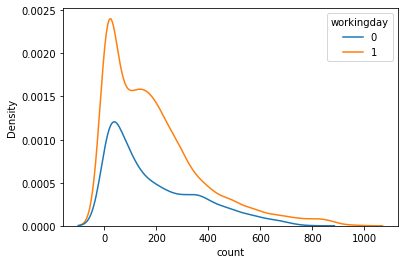

In [ ]:
sns.kdeplot(x = 'count', data = raw_data, hue = 'workingday')

In [ ]:
no_workingday = raw_data[raw_data['workingday'] == 0]['count']
workingday = raw_data[raw_data['workingday'] == 1]['count']

In [ ]:
print(shapiro(no_workingday))
# let's check the p-value for after log transform
print(shapiro(np.log(no_workingday)))

ShapiroResult(statistic=0.8852126598358154, pvalue=4.203895392974451e-45)
ShapiroResult(statistic=0.9339465498924255, pvalue=9.749252684808278e-37)


As p-value is very small, we reject the null hypothesis which means distrinution is not normal and even after doing log transform it's not improved.

In [ ]:
print(shapiro(workingday))

ShapiroResult(statistic=0.8702576160430908, pvalue=0.0)


Let's use the Boxcox transformation on these data.

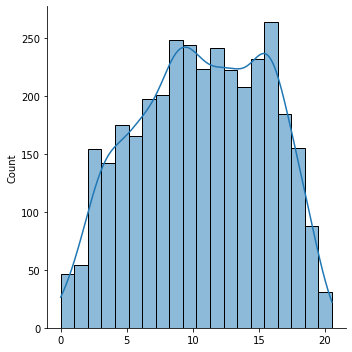

In [ ]:
trans_no_workingday, tran_lambda = boxcox(no_workingday)
sns.displot(trans_no_workingday, kde = True)

In [ ]:
print(shapiro(trans_no_workingday))

ShapiroResult(statistic=0.975882351398468, pvalue=8.139842317861285e-24)


From the kde plot and shapiro test, we can day that the distributions are not normal.
Even after applying boxcox transformation data is not becoming normal.

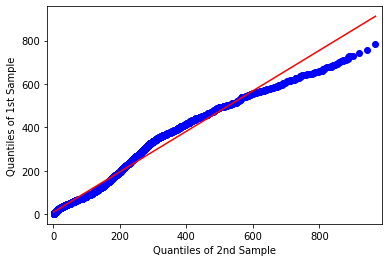

In [ ]:
#Quantitle - Quantile plot.
# it shows how similar two samples are
qqplot_2samples(no_workingday, workingday, line = 'r')
plt.show()

Here, we can see that the data is almost same 60 percentile. There is slight deviation in the end.

Let's explore more on this using Empherical CDF.

In [ ]:
e1 = ECDF(no_workingday)
e2 = ECDF(workingday)

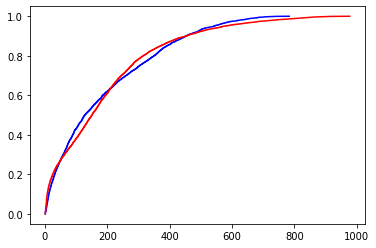

In [ ]:
plt.plot(e1.x, e1.y, c = 'b')
plt.plot(e2.x, e2.y, c = 'r')

Both the CDF plots for the number of cycles rented on working day and non working day looks similar.

Before applying the t test let's check on whether the variance of two samples are similar or not.

In [ ]:
print(no_workingday.std())
print(workingday.std())

173.7240153250003
184.5136590421481


We can see that there is difference in the standard deviation in numbers of electric cycles on working day and on non working day.

Let's see if this ***difference is statistically significant*** or not.
We will test that using leven

H0: std of both are same

Ha: std are not same

In [ ]:
levene(no_workingday, workingday)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

We fail to reject the Null hypothesis, **which means difference in std is not significant**.

Thus, we can apply t test.

In [ ]:
ttest_ind(no_workingday, workingday)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

If we take alpha as 5%, then also we fail to reject the Null hypothesis.

**So, the number of electric cycles rented is not dependent on whether the day is working or not.**

In [ ]:
#let's do annova on this to see if we will get same result
f_oneway(no_workingday, workingday)

F_onewayResult(statistic=1.4631992635777575, pvalue=0.22644804226428558)

From ANOVA test also we can conclude that number of bike rented is independent of working day status.

In [ ]:
# let's do the kruskal test also as it does in rank way (so it doesn't require accomplish all assumptions of ANOVA)
kruskal(no_workingday, workingday)

KruskalResult(statistic=0.0016182887191034687, pvalue=0.9679113872727798)